In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import os
from scipy import io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

Explained variance ratio: [0.47526921 0.26621782 0.16369511 0.09481786]


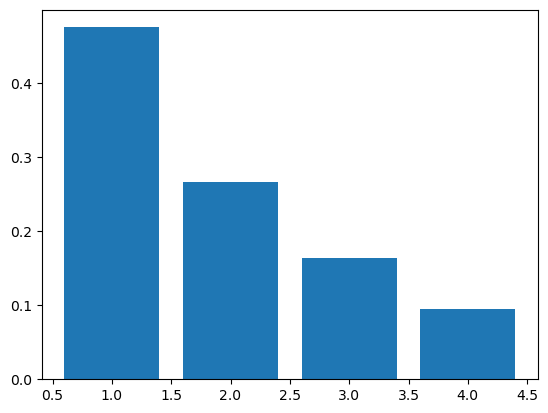

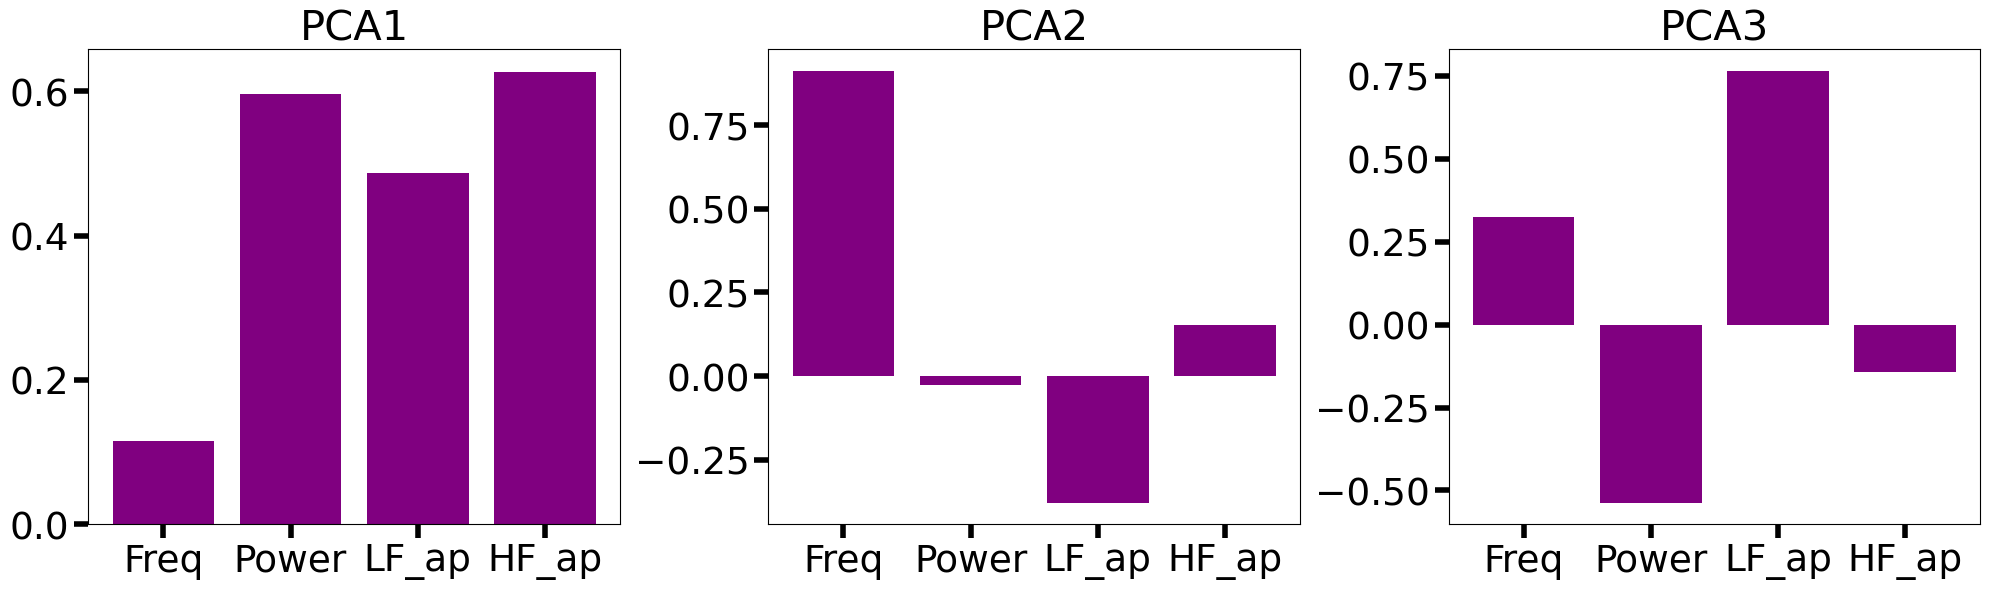

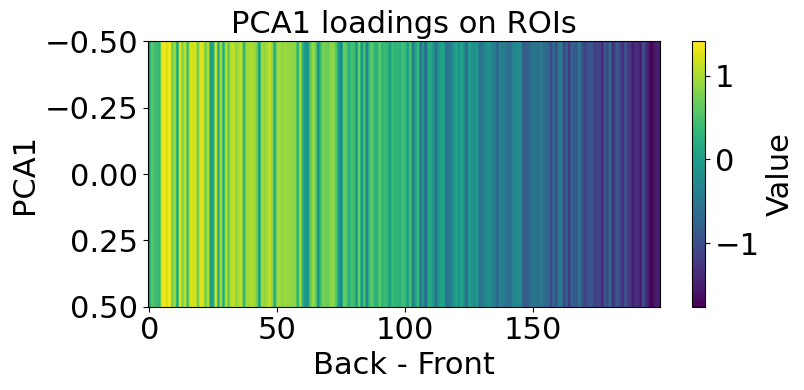

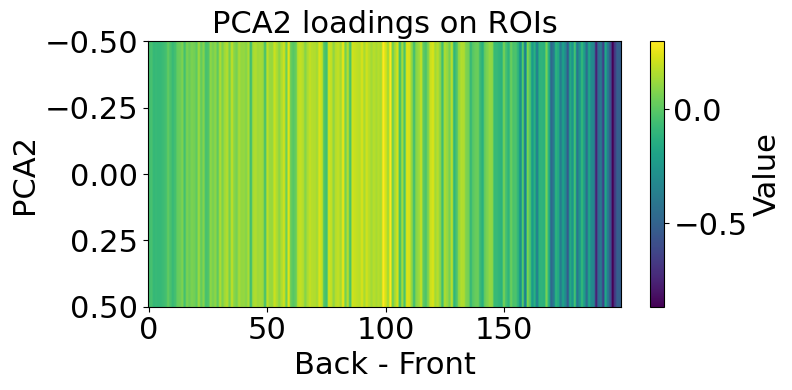

In [ ]:
# Load in combined data file with empirical and modelling results
combined_data = pd.read_csv('/data/combined_data_final.csv') # Change to path of combined_data file

# For plotting over back-front of head, estimation of average MNI y coordinate for each ROIs
# Load Shaefer 200 Parcels labels and source space data
subjects_dir = '/path_to_freesurfer/freesurfer_subjects'
subject = 'fsaverage_small'
os.environ['SUBJECTS_DIR'] = subjects_dir 

labels =  mne.read_labels_from_annot(
    subject='fsaverage_small', parc="Schaefer2018_200Parcels_17Networks_order", subjects_dir=subjects_dir, verbose=False
)
src = mne.read_source_spaces(subjects_dir + '/fsaverage_small/bem/fsaverage_small-oct6-src.fif', verbose=False)
# Determine MNI y average coordinate for left side ROIs and right side ROIs
y_avg_coord = np.zeros(len(labels))

for i in range(0,len(labels)):
    if i < 100:
        lh_coordinates = src[0]['rr'][labels[i].vertices]
        y_avg_coord[i] = lh_coordinates[:, 1].mean()
    else:
        rh_coordinates = src[1]['rr'][labels[i].vertices]
        y_avg_coord[i] = rh_coordinates[:, 1].mean()
y_avg_coord = y_avg_coord[:-2] # Only keep cortical ROIs (200)

# Empirical PCA

data =  np.array(combined_data[['freq','power','low_exp','high_exp']])

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_standardized)

# Print and plot the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
explained_variance_first_two_components = pca.explained_variance_ratio_[0]  + pca.explained_variance_ratio_[1]
plt.bar([1,2,3,4],pca.explained_variance_ratio_)
plt.show()

# Plot loadings of each principal components
labels = ['Freq', 'Power', 'LF_ap', 'HF_ap']
titles = ['PCA1', 'PCA2', 'PCA3']
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns
for i, ax in enumerate(axes):
    ax.bar(labels, pca.components_[i, :], color='purple')
    ax.set_title(titles[i], fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=27, width=4, length=10)
plt.tight_layout() 
plt.show()

# Plot mean loadings of PCA1 over ROIs (x axis is back-front of the head)
new_res = np.reshape(data_pca[:,0], (607, 200))
mean_res = np.mean(new_res, axis=0)
# Sort data based on y_avg_coord to  have back-front
sorted_indices = np.argsort(y_avg_coord)
sorted_mean_res = mean_res[sorted_indices]
plt.figure(figsize=(8, 4))
heatmap = plt.imshow(sorted_mean_res[np.newaxis, :], cmap='viridis', aspect='auto')
cbar = plt.colorbar(heatmap, label='Value')
cbar.set_label('Value', fontsize=22)
cbar.ax.tick_params(labelsize=22)
plt.xlabel('Back - Front', fontsize=22)
plt.ylabel('PCA1', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('PCA1 loadings on ROIs', fontsize=22)
plt.tight_layout()
plt.show()

# Plot mean loadings of PCA2 over ROIs (x axis is back-front of the head)
new_res = np.reshape(data_pca[:,1], (607, 200))
mean_res = np.mean(new_res, axis=0)
# Sort data based on y_avg_coord to  have back-front
sorted_indices = np.argsort(y_avg_coord)
sorted_mean_res = mean_res[sorted_indices]
plt.figure(figsize=(8, 4))
heatmap = plt.imshow(sorted_mean_res[np.newaxis, :], cmap='viridis', aspect='auto')
cbar = plt.colorbar(heatmap, label='Value')
cbar.set_label('Value', fontsize=22)
cbar.ax.tick_params(labelsize=22)
plt.xlabel('Back - Front', fontsize=22)
plt.ylabel('PCA2', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('PCA2 loadings on ROIs', fontsize=22)
plt.tight_layout()
plt.show()




Explained variance ratio: [0.40718047 0.26960314 0.18954057 0.13367583]


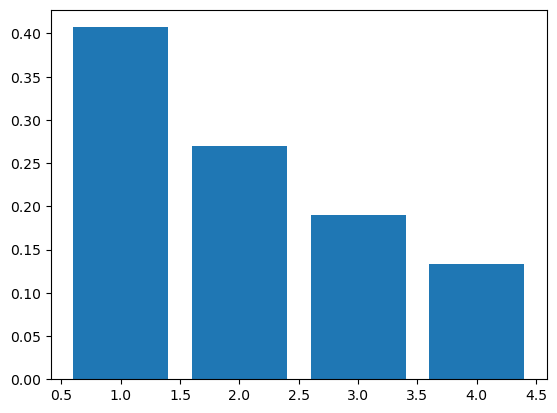

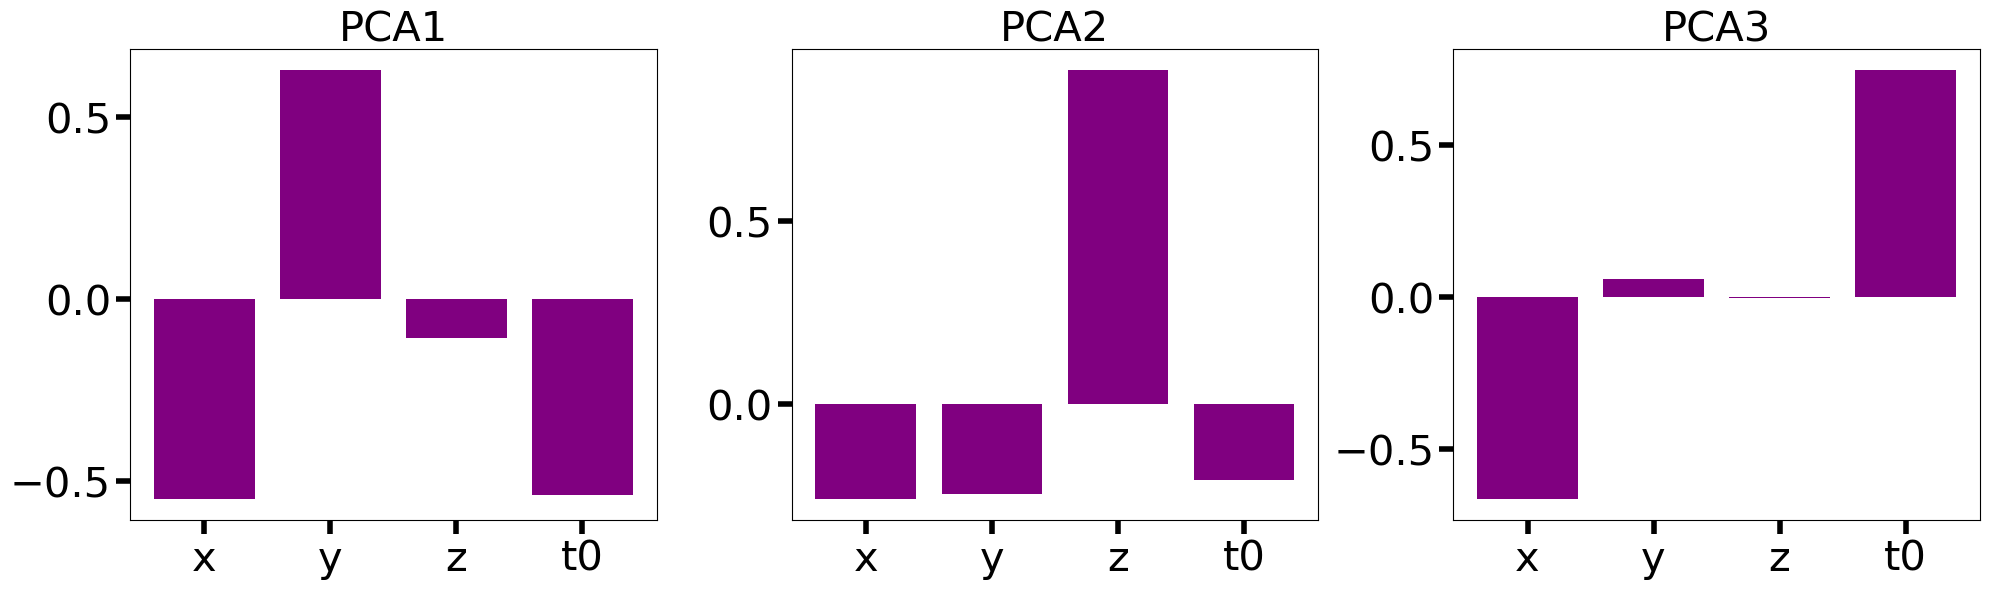

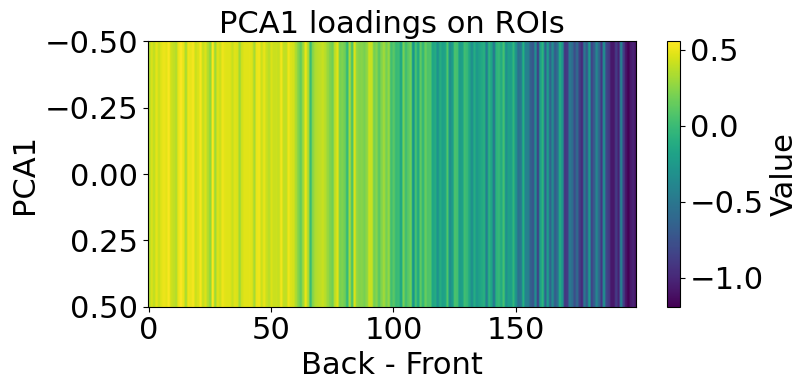

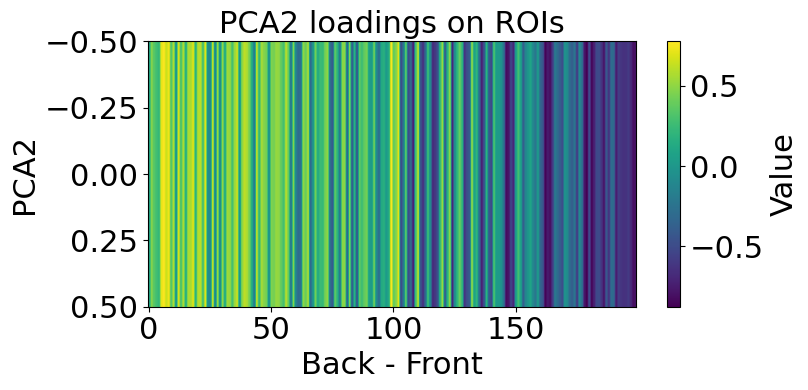

In [7]:

# Modelling PCA

# Take results from modelling parameters and remove nans
data =  np.array(combined_data[['x','y','z','t0']])
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_standardized)

# Print and plot the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
explained_variance_first_two_components = pca.explained_variance_ratio_[0]  + pca.explained_variance_ratio_[1]
plt.bar([1,2,3,4],pca.explained_variance_ratio_)
plt.show()
# Plot loadings of each principal components
labels = ['x', 'y', 'z', 't0']
titles = ['PCA1', 'PCA2', 'PCA3']

fig, axes = plt.subplots(1, 3, figsize=(20, 6)) 
for i, ax in enumerate(axes):
    ax.bar(labels, pca.components_[i, :], color='purple')
    ax.set_title(titles[i], fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30, width=4, length=10)
plt.tight_layout() 
plt.show()

# Plot mean loadings of PCA1 over ROIs (x axis is back-front of the head)
new_res = np.reshape(data_pca[:,0], (607, 200))
mean_res = np.mean(new_res, axis=0)
# Sort data based on y_avg_coord to  have back-front
sorted_indices = np.argsort(y_avg_coord)
sorted_mean_res = mean_res[sorted_indices]
plt.figure(figsize=(8, 4))
heatmap = plt.imshow(sorted_mean_res[np.newaxis, :], cmap='viridis', aspect='auto')
cbar = plt.colorbar(heatmap, label='Value')
cbar.set_label('Value', fontsize=22)
cbar.ax.tick_params(labelsize=22)
plt.xlabel('Back - Front', fontsize=22)
plt.ylabel('PCA1', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('PCA1 loadings on ROIs', fontsize=22)
plt.tight_layout()
plt.show()


# Plot mean loadings of PCA2 over ROIs (x axis is back-front of the head)
new_res = np.reshape(data_pca[:,1], (607, 200))
mean_res = np.mean(new_res, axis=0)
# Sort data based on y_avg_coord to  have back-front
sorted_indices = np.argsort(y_avg_coord)
sorted_mean_res = mean_res[sorted_indices]
plt.figure(figsize=(8, 4))
heatmap = plt.imshow(sorted_mean_res[np.newaxis, :], cmap='viridis', aspect='auto')
cbar = plt.colorbar(heatmap, label='Value')
cbar.set_label('Value', fontsize=22)
cbar.ax.tick_params(labelsize=22)
plt.xlabel('Back - Front', fontsize=22)
plt.ylabel('PCA2', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.title('PCA2 loadings on ROIs', fontsize=22)
plt.tight_layout()
plt.show()